# CAMDA
https://bipress.boku.ac.at/camda2025/the-camda-contest-challenges/#synthetic-health-records

The Synthetic Clinical Health Records Challenge provides a rich set of highly realistic Electronic Health Records (EHRs) tracing the diagnosis trajectories of diabetic patients, created with dual-adversarial auto-encoders trained on data from 1.2 million real patients in the Population Health Database of the Andalusian Ministry of Health. Predict relevant diabetes endpoints like blindness or cardiopathy from past diagnosis trajectories!

`DATASET DESCRIPTION: 
DualAAE-EHR DIABETES GEN3 for CAMDA (diabetes-dualAAE-EHR-CAMDA GEN`3):

A 3rd generation synthetic dataset was generated by the same DualAA -EHR
model from an extended population of 1062550 real diabetes pat  ents.

The cohort of real patients has some differences in filterng and 
preprocessing regading previous generations   mainly:

- Amputation, a low frequency endpoint, is kept for all visits, not filtering.
- Sex is still coded as a first visit with the following labels:
  "1111" --> men | "2222" --> women
- All visits feature an age label. Ages from 0-120 are labelled as:
  "9000", "9001", "9002", ..., "9120"
- Chronic pathology codes have been reduced to 81. Two codes were removed 
  from previous generation (not considered chronic anymore):
  "0901" -> Acute cerebrovascular disease
  "0903" -> Transient ischemic attack

The 999,936 patients for this third generation synthetic EHRs were generated
extended visit dates and new patients till end of 2022. Each patient is still 
coded as a ordered list of visits, each of them with a list of co-occurring 
chronic diagnoses. As the diagnoses are chronic they all affect patients from
the time recorded onwards.  

A pre-processed cleaned up version of this dataset is also provided, in
case users want to use it instead: daae_generated_diabetes_patients_camda_gen3_preprocessed.json  

This pre-processed version reduces the number of patients to 994,095 by
performing the following cleaning steps:
- Patients without diabetes code were discarded.
- Empty visits or visits only with age codes were removed.
- Only the first appearance of each diagnosis was kept (as they are
  chronic diseases).
- In case several age codes are provided in one visit, the code of the
  older age is kept.
- In visits without age code, age is inferred. Average age between previous
  and posterior visit is considered. In case visit is the first or last one, 
  same age as posterior or previous visit is considered, respectively.

Two challenges are suggested on both datasets, although any other original analysis you may think will also be welcomed:

1) Finding some strong relationships in diabetes-associated pathologies that allows to predict any pathology before this is diagnosed. Some well-known pathological diabetes consequences, which can be considered relevant endpoints to predict, can be:  
   a) Retinopathy (Code “703”),  
   b) Chronic kidney disease (Code “1401”),  
   c) Ischemic heart disease (Code “910”),  
   d) Amputations (Code “1999”)  

2) Another proposed challenge is the prediction of disease trajectories in diabetes patients (see for example: Jensen et al. Nat Commun. 2014)

Prediction proposals which are submitted with the model trained and the code required to run the model can be tested on the real dataset by the organisers and participate in a collective publication.

In [133]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
#format data
with open('data/daae_generated_diabetes_patients_camda_gen3_preprocessed.json', 'r') as file:
    data = json.load(file)
rows=[]
for k,v in data.items():
    #print(v.pop(0),v)
    if len(v[0]) == 1:
        row = {"id":k,"sex":v.pop(0)[0],"relation":v}
        rows.append(row)
    else:
        row = {"id":k,"sex":"NA","relation":v}
        rows.append(row)

In [125]:
data = pd.DataFrame(rows)

In [127]:
data["number of visit"] = data["relation"].apply(len)

In [139]:
data.shape

(994095, 4)

In [134]:
data2 = data[((data["sex"] == '1111') | (data["sex"] == '2222')  | (data["sex"] == 'NA'))] #datapoints with no age or sex 0.3%

In [138]:
data2.shape

(991218, 4)

Text(0, 0.5, 'Frequency')

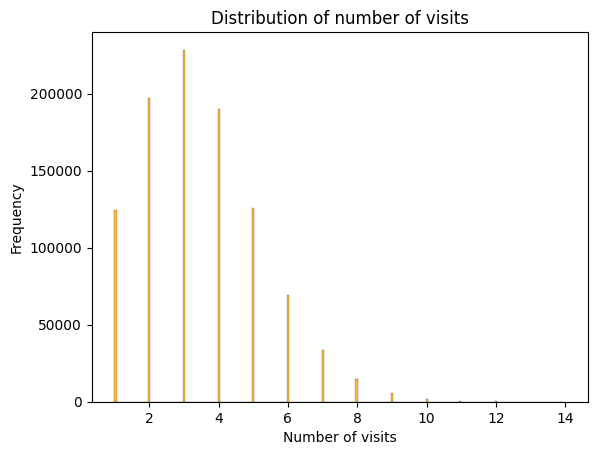

In [135]:
sns.histplot(data2["number of visit"], color='orange')
plt.title('Distribution of number of visits')
plt.xlabel("Number of visits")
plt.ylabel('Frequency')

In [140]:
data2.shape

(991218, 4)

In [144]:
data2 = data2[data2["number of visit"]!=1] #filtering entries with one visit only 12.5%

In [145]:
data2.shape

(866693, 4)

In [148]:
data2[data2["sex"]=="NA"] #5.2% without gender

,id,sex,relation,number of visit
8,8,NA,"[[9067, 401, 1001], [9071, 913], [9071, 1301],...",6
15,15,NA,"[[9059, 402, 1302], [9060, 1001, 702], [9061, ...",6
20,20,NA,"[[9052, 1302], [9054, 913, 506], [9063, 207], ...",6
48,48,NA,"[[9069, 401], [9077, 402, 913, 507]]",2
72,73,NA,"[[9084, 913], [9084, 401, 402, 914], [9089, 90...",4
...,...,...,...,...
993979,999820,NA,"[[9047, 913], [9047, 402, 914, 404], [9053, 401]]",3
993993,999834,NA,"[[9057, 913], [9064, 401], [9064, 402, 1302]]",3
994011,999852,NA,"[[9066, 401, 913], [9066, 402, 1302]]",2
994014,999855,NA,"[[9061, 401], [9066, 913], [9074, 909]]",3


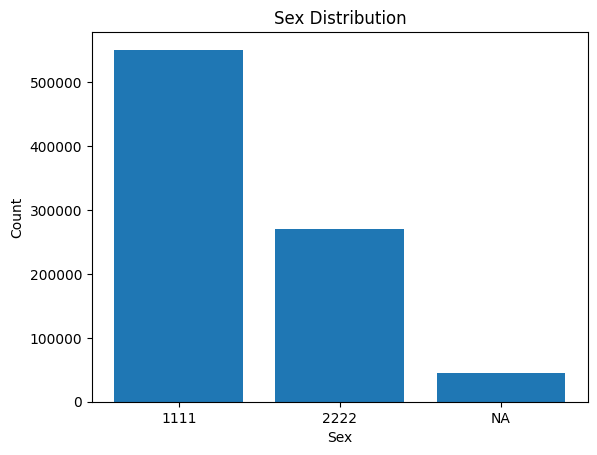

In [157]:
sex_counts = data2['sex'].value_counts()
plt.bar(sex_counts.index, sex_counts.values)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Sex Distribution')
plt.show()

----------------------------------------------

In [170]:
def process(i):
    return i[0]

In [171]:
data2["first_visit"] = data2["relation"].apply(process)

In [172]:
data2

,id,sex,relation,number of visit,first_visit
0,0,2222,"[[9070, 913], [9070, 401], [9072, 1302], [9074...",7,"[9070, 913]"
1,1,2222,"[[9047, 1302], [9057, 913], [9058, 703, 1307],...",10,"[9047, 1302]"
2,2,1111,"[[9064, 401], [9064, 1302], [9066, 402, 913], ...",5,"[9064, 401]"
3,3,1111,"[[9068, 913], [9068, 404], [9069, 1302], [9069...",8,"[9068, 913]"
4,4,2222,"[[9048, 913, 1001], [9048, 401], [9054, 402], ...",7,"[9048, 913, 1001]"
...,...,...,...,...,...
994069,999910,2222,"[[9062, 401, 402, 913], [9062, 1304]]",2,"[9062, 401, 402, 913]"
994070,999911,1111,"[[601, 502], [401, 902, 905, 404, 206, 602, 50...",2,"[601, 502]"
994071,999912,NA,"[[9033, 402], [9033, 401]]",2,"[9033, 402]"
994075,999916,1111,"[[9042, 913], [9048, 401]]",2,"[9042, 913]"
